In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# from .evaluation_utils import EvaluationUtils

from evaluation.evaluation_utils import *

In [2]:
no_task_loss_prog_df = pd.read_csv('./loss_progression_no_tasks.csv', index_col=0)
no_task_train_prediction_df = pd.read_csv('./util_lstm_train_no_tasks.csv', index_col=0)
no_task_test_prediction_df = pd.read_csv('./util_lstm_test_no_tasks.csv', index_col=0)

In [3]:
def calculate_mape(actual, predicted) -> float:
  
    # Convert actual and predicted
    # to numpy array data type if not already
    if not all([isinstance(actual, np.ndarray), isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual), np.array(predicted)
  
    # Calculate the MAPE value and return
    return round(np.mean(np.abs((
      actual - predicted) / actual)), 2)

def calculate_smape(actual, predicted) -> float:
    if not all(
        [isinstance(actual, np.ndarray), isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual), np.array(predicted)
    
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual)) / 2)
        ),
        ndigits=2
    )

In [27]:
from typing import Tuple


def prepare_wastage_series(df: pd.DataFrame, column: int, is_over_allocated: bool = True) -> pd.Series:
    df_columns = df.columns.tolist()
    actual_value_series: pd.Series = df[df_columns[0]]
    calculate_series: pd.Series = df[df_columns[column]].dropna()
    calc_indices = calculate_series.index
    
    return calculate_series - actual_value_series[calc_indices]

    
    

In [75]:
def calculate_wastage_difference(df: pd.DataFrame, predicted_col: int, allocated_col: int) -> float:
    alloc = prepare_wastage_series(df, allocated_col)
    pred = prepare_wastage_series(df, predicted_col)
    
    return round(1 - ((pred.mean() / alloc.mean())), 3)

In [63]:
test_df.head()

,actual cpu usage,predicted cpu usage,allocated cpu
0,773.050781,NaN,NaN
1,608.671021,NaN,NaN
2,608.102417,NaN,NaN
3,385.129120,NaN,600.0
4,614.094116,NaN,NaN


In [62]:
test_df = get_over_allocated_dataframe(no_task_train_prediction_df, [0, 2, 4])
print(test_df.columns)
# ind = prepare_wastage_df(test_df, [1, 2]).iloc[:, 1].dropna().index
pred = prepare_wastage_series(test_df, 1)
alloc = prepare_wastage_series(test_df, 2)
# test_df['predicted cpu usage'] -  test_df['actual cpu usage']
# test_df.iloc[:, 0] < test_df.iloc[:, 1]
pred.mean(), alloc.mean()

Index(['actual cpu usage', 'predicted cpu usage', 'allocated cpu'], dtype='object')


(231.32951034323068, 387.0570937202583)

In [76]:
calculate_wastage_difference(test_df, 1, 2)

0.402

In [69]:
1 - (pred.mean() / alloc.mean())

0.4023374998252278

In [39]:
pred.describe()

count    6347.000000
mean      231.329510
std       232.764239
min         0.024086
25%        96.958134
50%       209.587639
75%       262.605400
max      1374.346855
dtype: float64

In [40]:
alloc.describe()

count    6731.000000
mean      387.057094
std       251.960460
min         0.007202
25%       186.101814
50%       422.834763
75%       512.175362
max      1577.614717
dtype: float64

In [44]:
round((1 - (pred.mean() / alloc.mean())) * 100, 2)

40.23

In [126]:
a = with_task_train_prediction_df
a

,actual cpu usage,actual mem usage,predicted cpu usage,predicted mem usage,allocated cpu,allocated mem
0,773.050781,19.953011,593.401672,11.030788,400.0,10.000002
1,608.671021,14.726125,245.137146,12.258829,600.0,29.296875
2,608.102417,14.808974,245.137146,12.258829,600.0,29.296875
3,385.129120,14.586164,245.137146,12.258829,600.0,29.296875
4,614.094116,14.683479,245.137146,12.258829,600.0,29.296875
...,...,...,...,...,...,...
9995,255.589432,1.179744,438.827820,13.827876,600.0,29.296875
9996,123.900002,0.293164,342.203979,11.639269,600.0,29.296875
9997,62.916664,1.066337,243.971756,9.967765,1600.0,29.296875
9998,209.150009,2.828485,199.832352,3.451106,50.0,48.828125


In [128]:
def calc_(actual, predicted):
    print(f'MAPE {calculate_mape(actual, predicted)}')
    print(f'sMAPE {calculate_smape(actual, predicted)}')

In [129]:
calculate_smape(a['actual cpu usage'], a['actual cpu usage'])

0.0

In [130]:
calc_(a['actual cpu usage'], a['predicted cpu usage'])
calc_(a['actual cpu usage'], a['allocated cpu'])

MAPE 2.93
sMAPE 0.79
MAPE 4.72
sMAPE 0.95


In [118]:
calculate_smape(a['actual cpu usage'], a['predicted cpu usage'])

79.02

In [119]:
calculate_smape(a['actual cpu usage'], a['allocated cpu'])

95.29

In [54]:
no_task_loss_prog_df.rename(columns={'0': 'loss progress - no tasks'}, inplace=True)
no_task_loss_prog_df.head()

,loss progress - no tasks
0,0.067000
1,0.097104
2,0.096889
3,0.009040
4,0.016942


In [55]:
with_task_loss_prog_df = pd.read_csv('./loss_progression_with_tasks.csv', index_col=0)
with_task_train_prediction_df = pd.read_csv('./util_lstm_train_with_tasks.csv', index_col=0)
with_task_test_prediction_df = pd.read_csv('./util_lstm_test_with_tasks.csv', index_col=0)

In [56]:
with_task_loss_prog_df.rename(columns={'0': 'loss progress - with tasks'}, inplace=True)

In [57]:
cycler = plt.cycler(linestyle=['-', '-', '-', '-.', '--', '-', '--'],
                    color=['black', 'blue', 'green', 'grey', 'green', 'black', 'green'],
)

def plot_df(df: pd.DataFrame, df_columns: list = None, start_range: int = -1, end_range: int = -1, save_plot_path: str = None, y_label: str = ''):  # type: ignore
    if df_columns is None or len(df_columns) == 0:
        df_columns = df.columns.to_list()
    if start_range == -1:
        start_range = 0
    if end_range == -1:
        end_range = len(df)
    fig, ax = plt.subplots()
    
    plt.xlabel('time step', fontsize=45)
    plt.ylabel(y_label, fontsize=45)
    
    ax.set_prop_cycle(cycler)
    plot = df[df_columns].iloc[start_range:end_range].plot.line(figsize=(25, 20), linewidth=4, fontsize=40, ax=ax)
    plt.legend(fontsize=40)
    if save_plot_path is not None:
        plot.figure.savefig(save_plot_path)


In [58]:
comp_loss_prog_df = pd.merge(left=no_task_loss_prog_df, right=with_task_loss_prog_df, left_index=True, right_index=True)

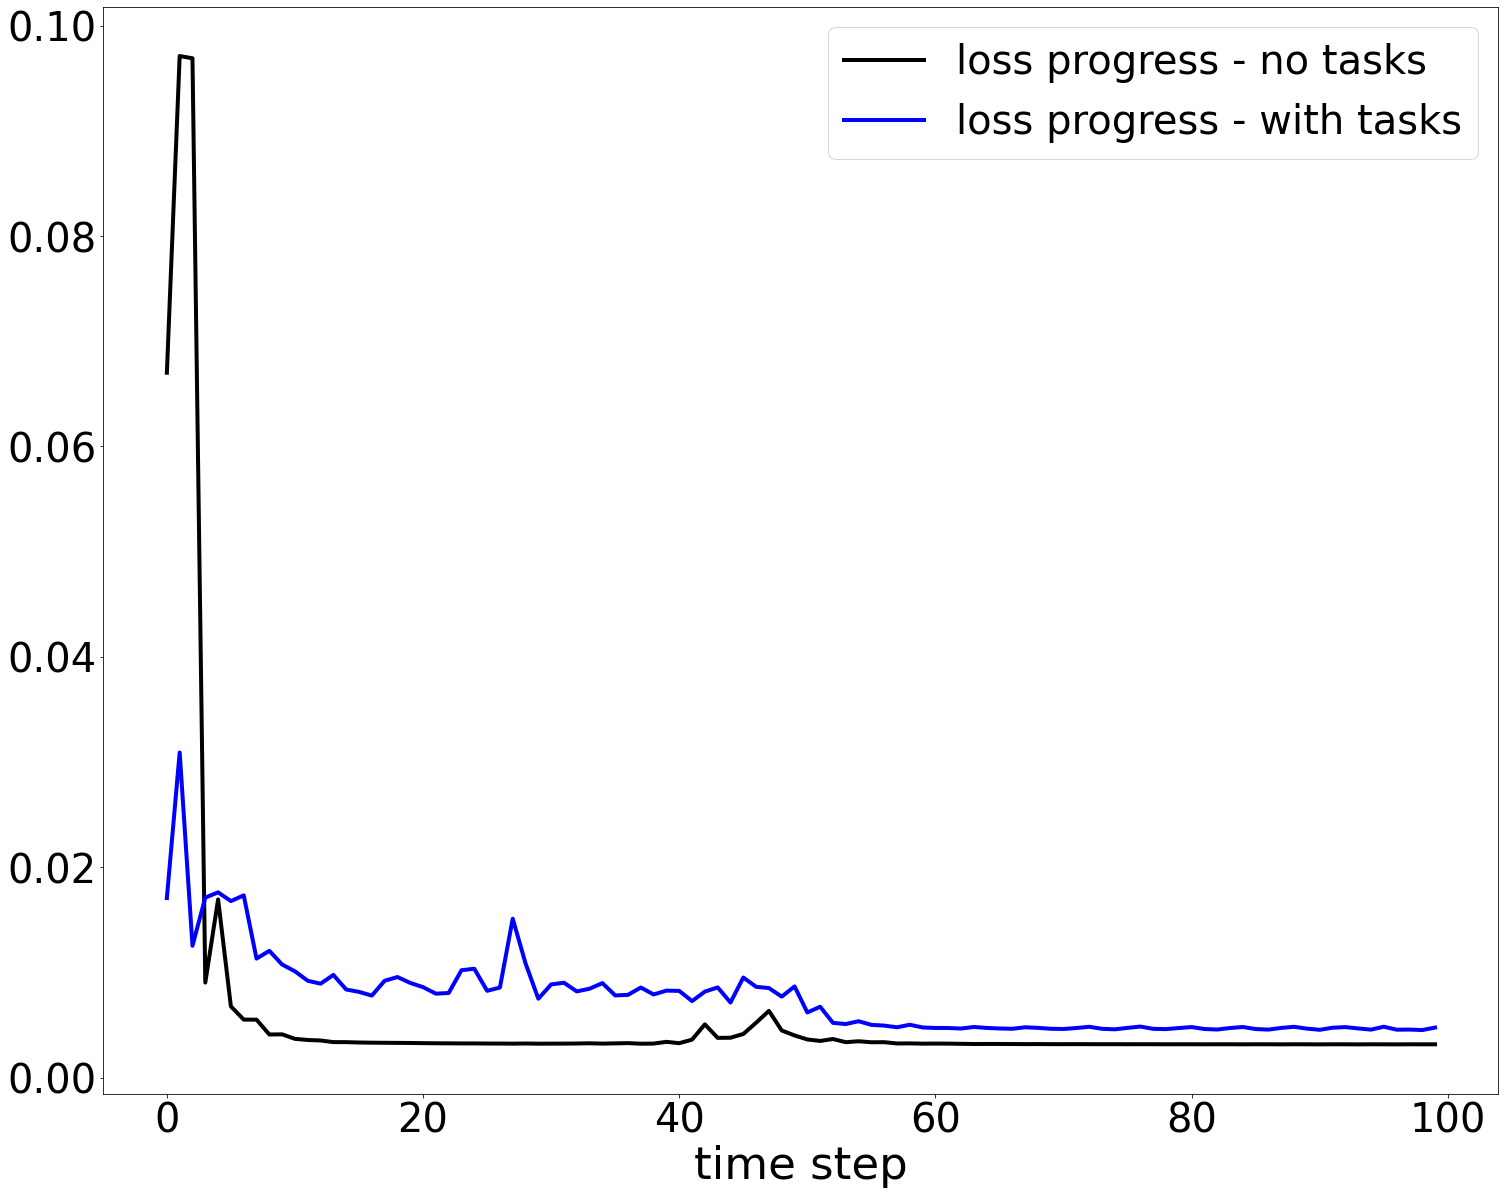

In [59]:
plot_df(comp_loss_prog_df)

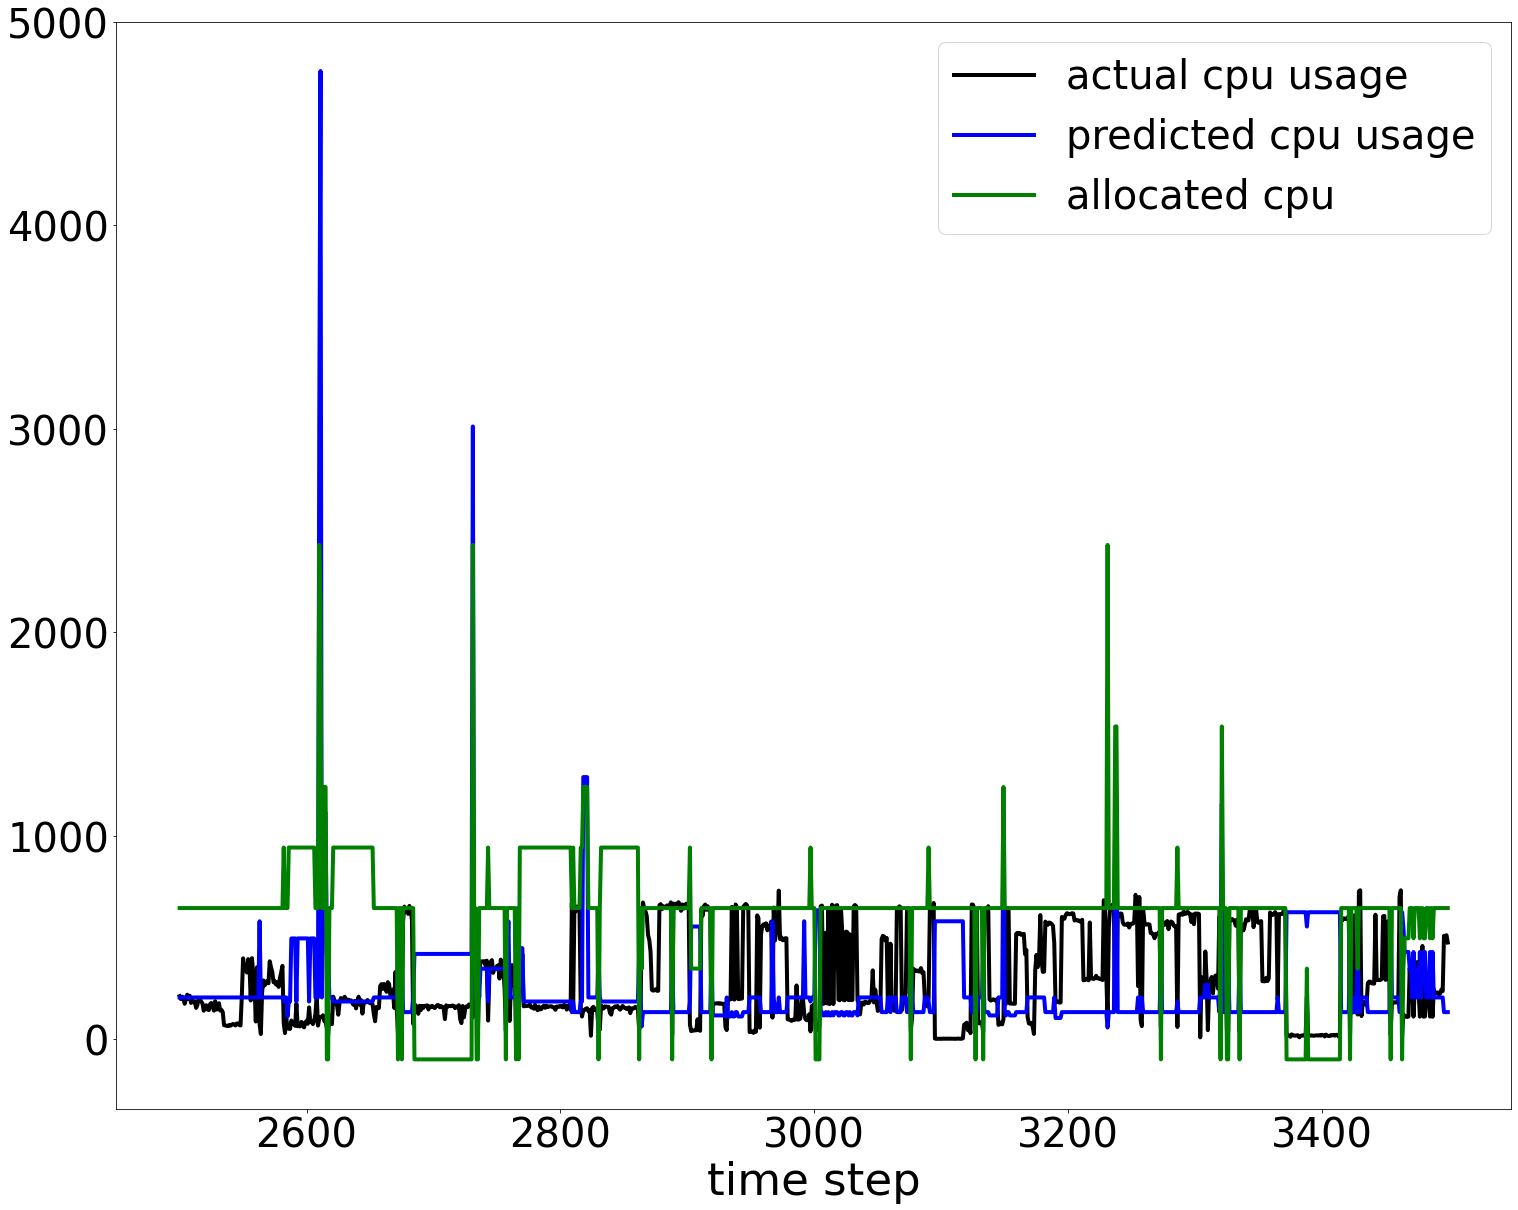

In [103]:
plot_df(no_task_test_prediction_df, df_columns=['actual cpu usage', 'predicted cpu usage', 'allocated cpu'], start_range=2500, end_range=3500)

In [61]:
no_task_train_prediction_df.columns

Index(['actual cpu usage', 'actual mem usage', 'predicted cpu usage',
       'predicted mem usage', 'allocated cpu', 'allocated mem'],
      dtype='object')

In [62]:
compare_df = pd.DataFrame()
common_columns = ['actual cpu usage', 'actual mem usage', 'allocated cpu', 'allocated mem']
compare_df[common_columns] = no_task_test_prediction_df[common_columns]
# compare_df[common_columns] = no_task_train_prediction_df[common_columns]
comparing_columns = ['predicted cpu usage', 'predicted mem usage']
compare_df[list(map('nt '.__add__, comparing_columns))] = no_task_test_prediction_df[comparing_columns]
compare_df[list(map('wt '.__add__, comparing_columns))] = with_task_test_prediction_df[comparing_columns]
# compare_df[list(map('nt '.__add__, comparing_columns))] = no_task_train_prediction_df[comparing_columns]
# compare_df[list(map('wt '.__add__, comparing_columns))] = with_task_train_prediction_df[comparing_columns]
# compare_df.plot.line(figsize=(30, 25))

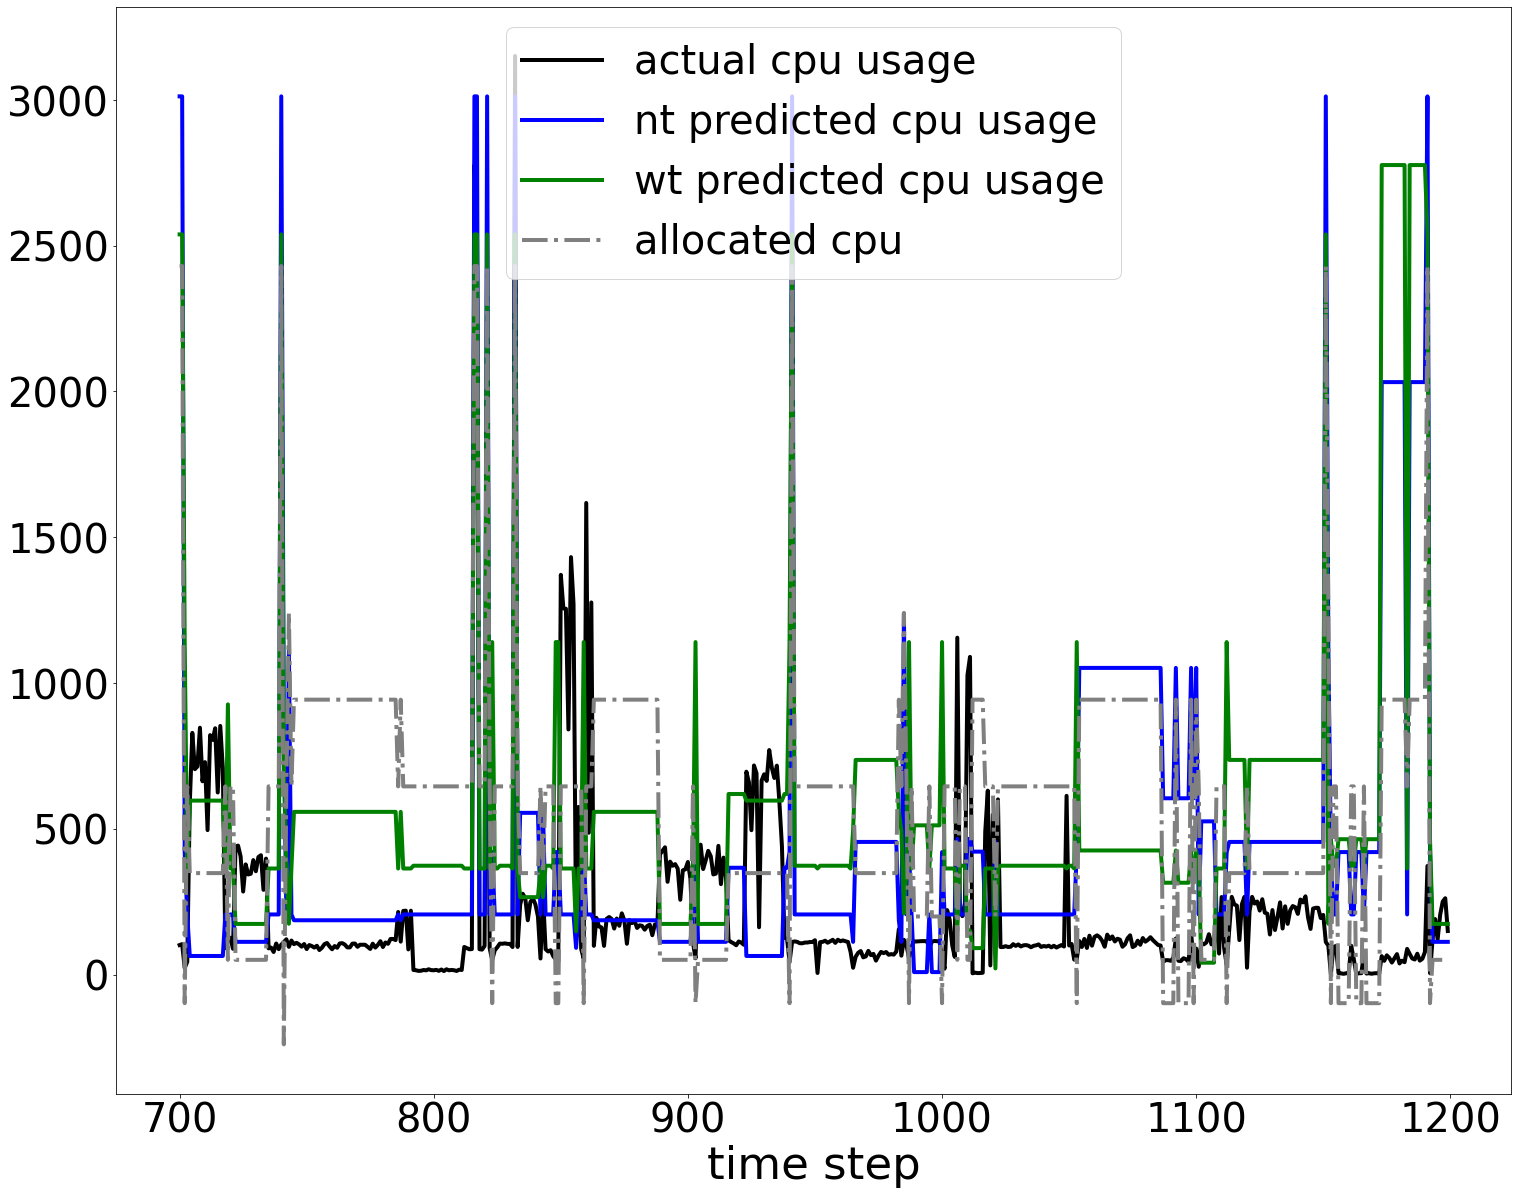

In [104]:
plot_df(compare_df, df_columns=['actual cpu usage', 'nt predicted cpu usage', 'wt predicted cpu usage', 'allocated cpu'], start_range=700, end_range=1200)

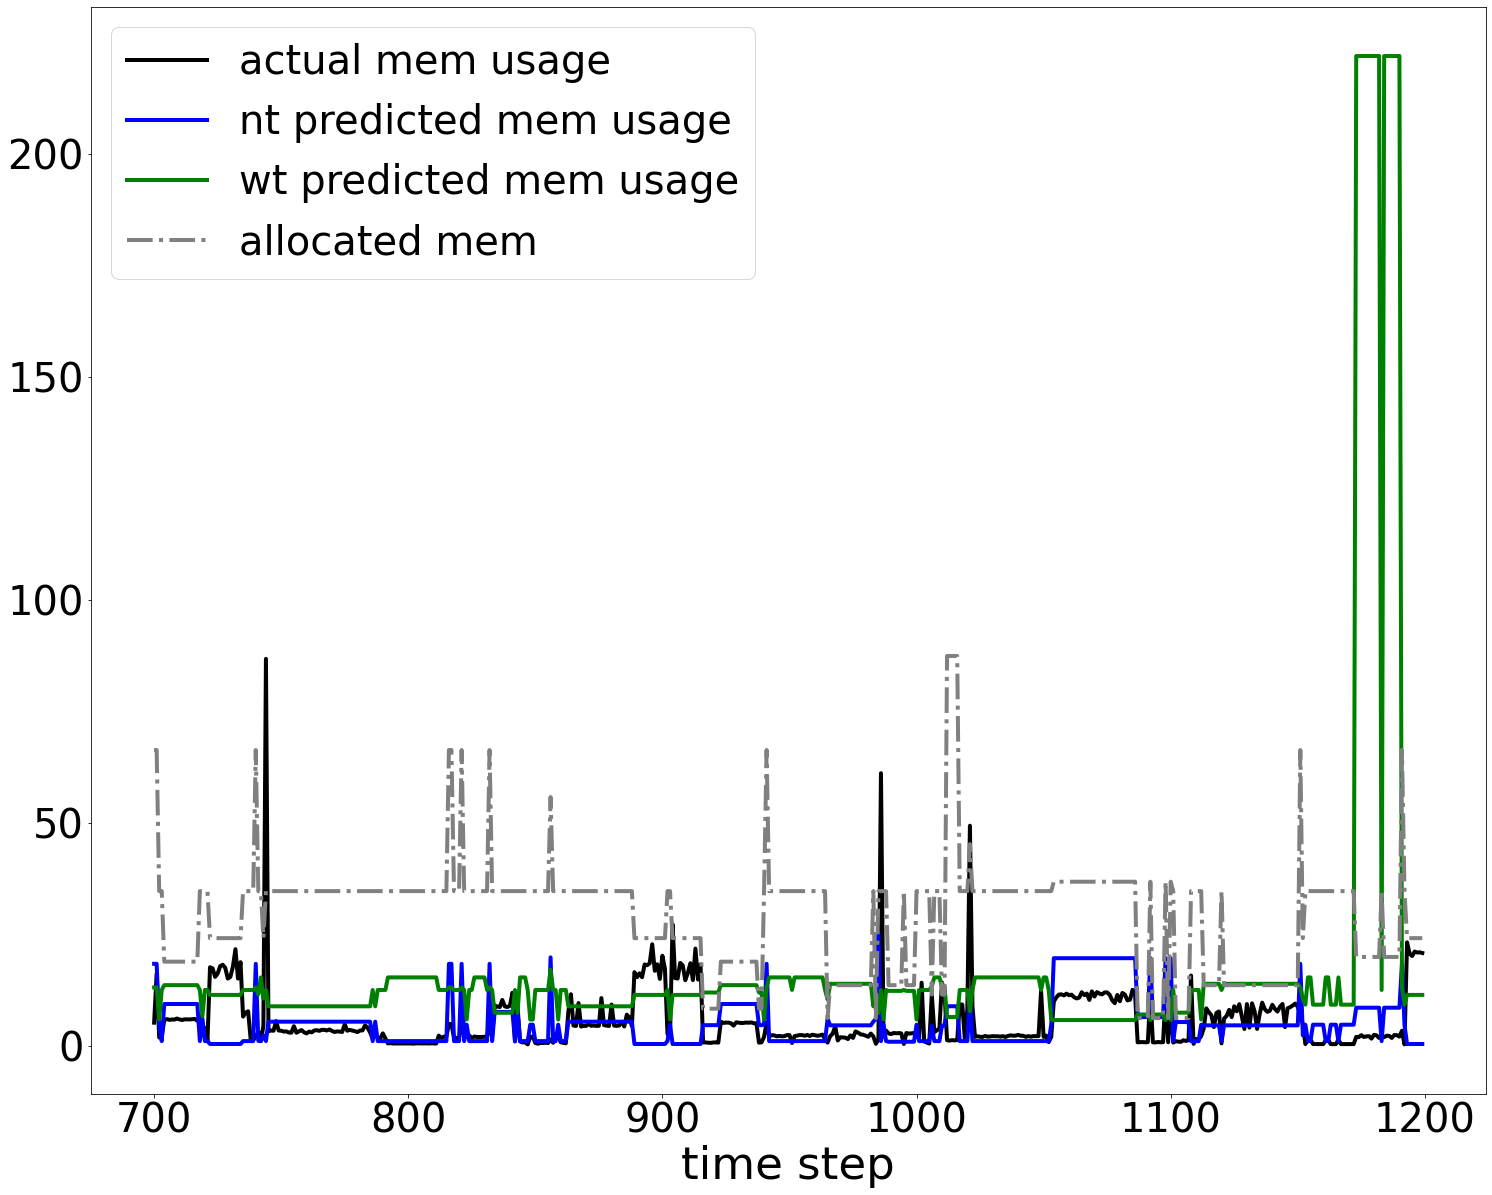

In [64]:
plot_df(compare_df, df_columns=['actual mem usage', 'nt predicted mem usage', 'wt predicted mem usage', 'allocated mem'], start_range=700, end_range=1200)

In [65]:
compare_df.iloc[0]

actual cpu usage           30.347826
actual mem usage            3.253242
allocated cpu             645.722290
allocated mem              34.643162
nt predicted cpu usage    580.861755
nt predicted mem usage     20.219227
wt predicted cpu usage    617.570435
wt predicted mem usage      1.828010
Name: 0, dtype: float64

In [66]:
# test_df = compare_df.iloc[3000:3500, [0, 2, 4, 6]]
test_df = compare_df.iloc[:, [0, 2, 4, 6]]
test_df

,actual cpu usage,allocated cpu,nt predicted cpu usage,wt predicted cpu usage
0,30.347826,645.722290,580.861755,617.570435
1,31.739130,645.722290,580.861755,617.570435
2,30.523809,645.722290,580.861755,617.570435
3,29.478262,645.722290,580.861755,617.570435
4,28.565216,645.722290,580.861755,617.570435
...,...,...,...,...
9995,228.259995,-97.823608,625.317749,245.800339
9996,245.369995,-97.823608,625.317749,245.800339
9997,242.329987,-97.823608,625.317749,245.800339
9998,259.967743,-97.823608,625.317749,245.800339


In [67]:
test_df.iloc[:, 2] / test_df.iloc[:, 0]

0       19.140144
1       18.301124
2       19.029792
3       19.704749
4       20.334583
          ...    
9995     2.739498
9996     2.548469
9997     2.580439
9998     2.405367
9999     2.510797
Length: 10000, dtype: float64

In [68]:
norm_df = pd.DataFrame()
for i in range(1, 4):
    column = test_df.columns[i]
    norm_df[column] = test_df.iloc[:, i] / test_df.iloc[:, 0]


In [69]:
norm_df.head(3)

,allocated cpu,nt predicted cpu usage,wt predicted cpu usage
0,21.277382,19.140144,20.349742
1,20.344675,18.301124,19.457699
2,21.154708,19.029792,20.232417


Source: https://medium.com/@BrendanArtley/matplotlib-color-gradients-21374910584b

In [70]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

# TODO

* Make axis description better
* Start at x axis value 1?
* Add a grid?
* What is density and stacked?

In [71]:
norm_df.iloc[:, 1].quantile(0.95)

27.82526779447856

In [72]:
nt = get_over_allocated_series(norm_df, 1, quantile=0.95)
wt = get_over_allocated_series(norm_df, 2, quantile=0.95)

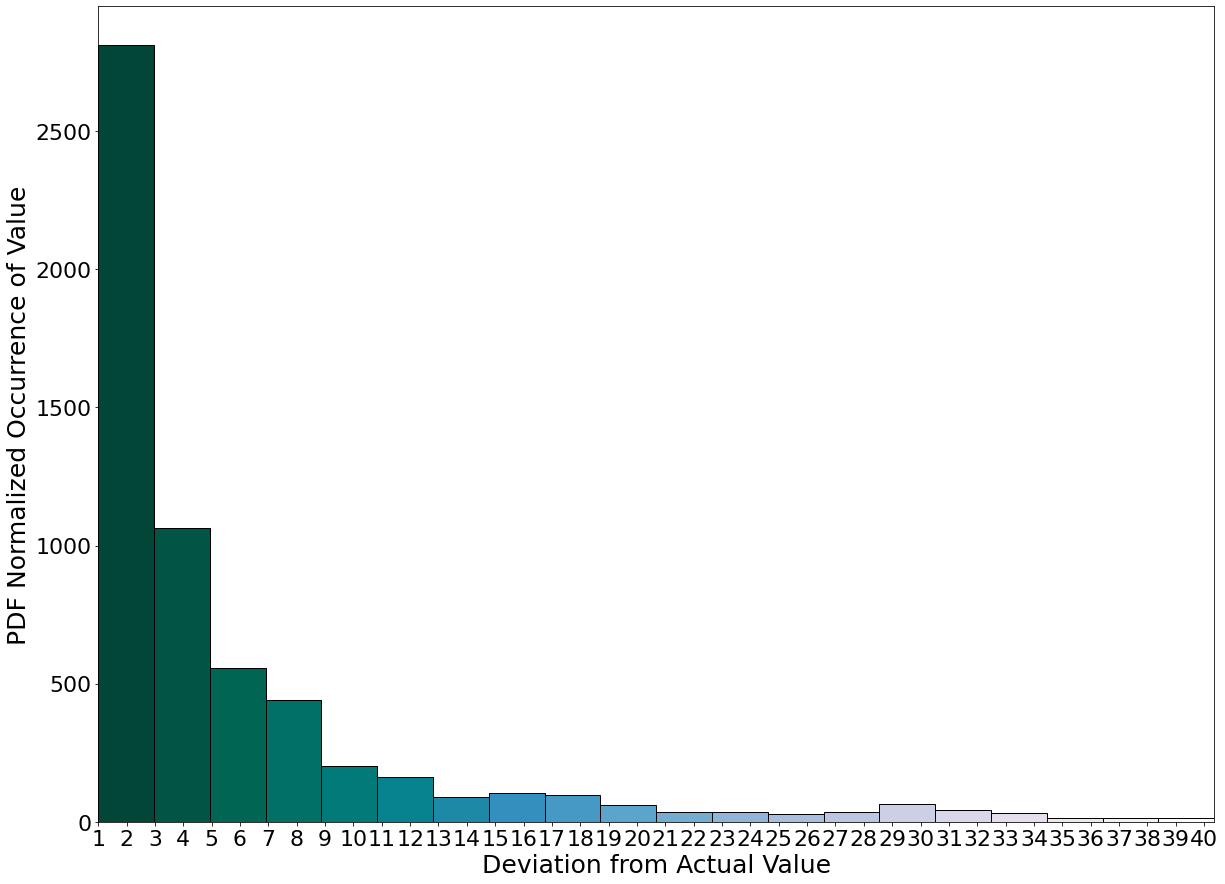

In [73]:
plot_histogram(nt, bin_size=20)

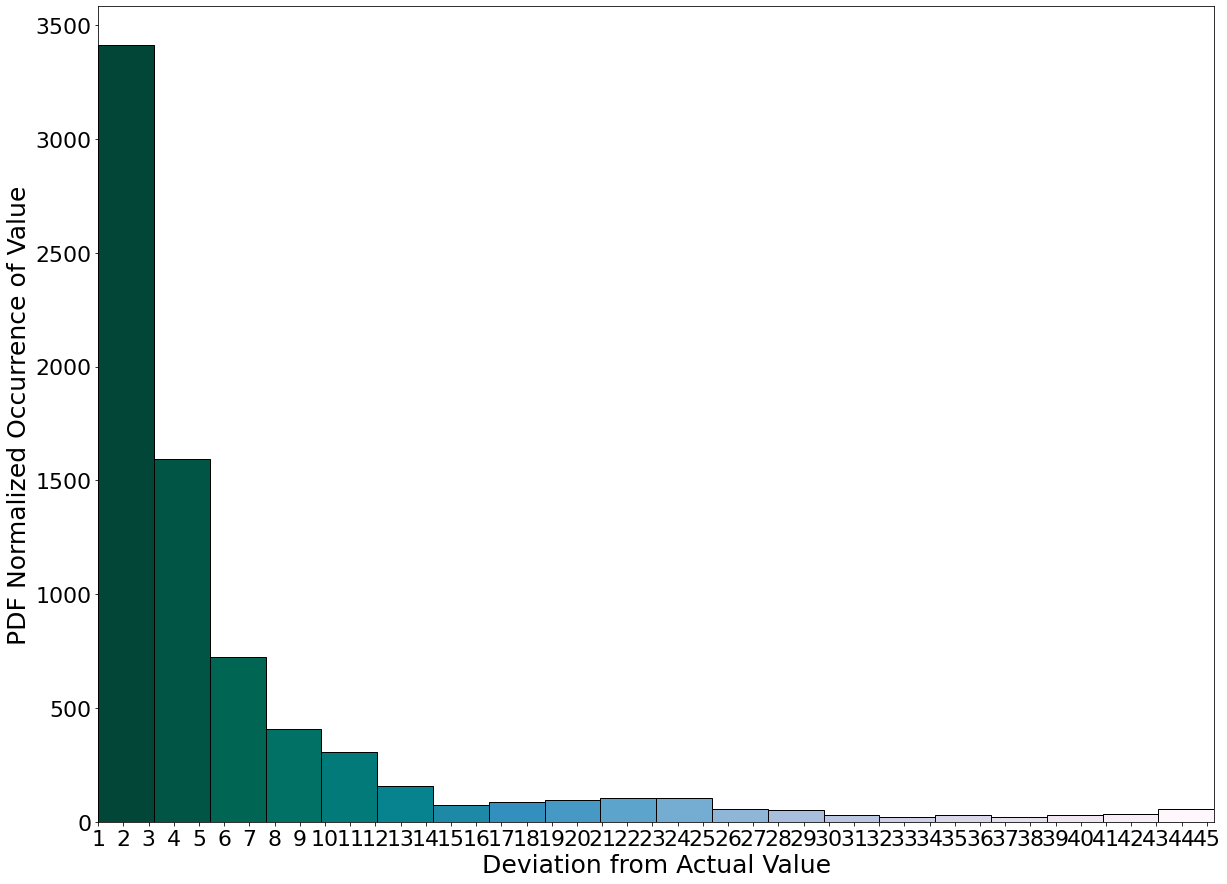

In [74]:
plot_histogram(wt, bin_size=20)

In [75]:
def plot_dataframe_kde(
    data: pd.DataFrame,
    fill: bool = False,
) -> None:
    sns.kdeplot(data=data, fill=fill)

<AxesSubplot:ylabel='Density'>

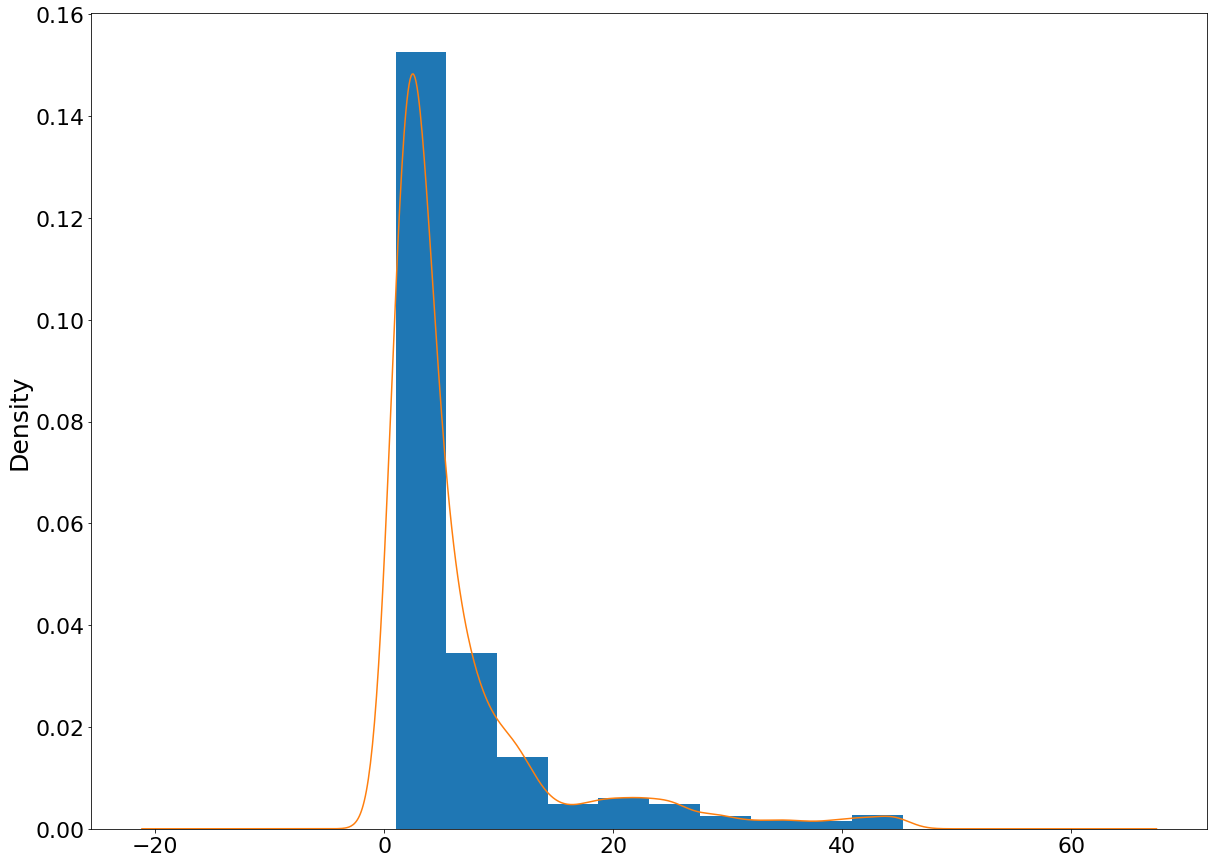

In [76]:
def plot_series_kde(
    data: pd.Series,
    fill: bool = False,
) -> None:
    sns.kdeplot(
        data=data, 
        fill=fill,
        
        cbar=True,
        )
    
ser_test = get_over_allocated_series(norm_df, 2, quantile=0.95)
# plot_series_kde(ser_test, fill=True)
ser_test.plot(kind='hist', density=True)
ser_test.plot(kind='kde')

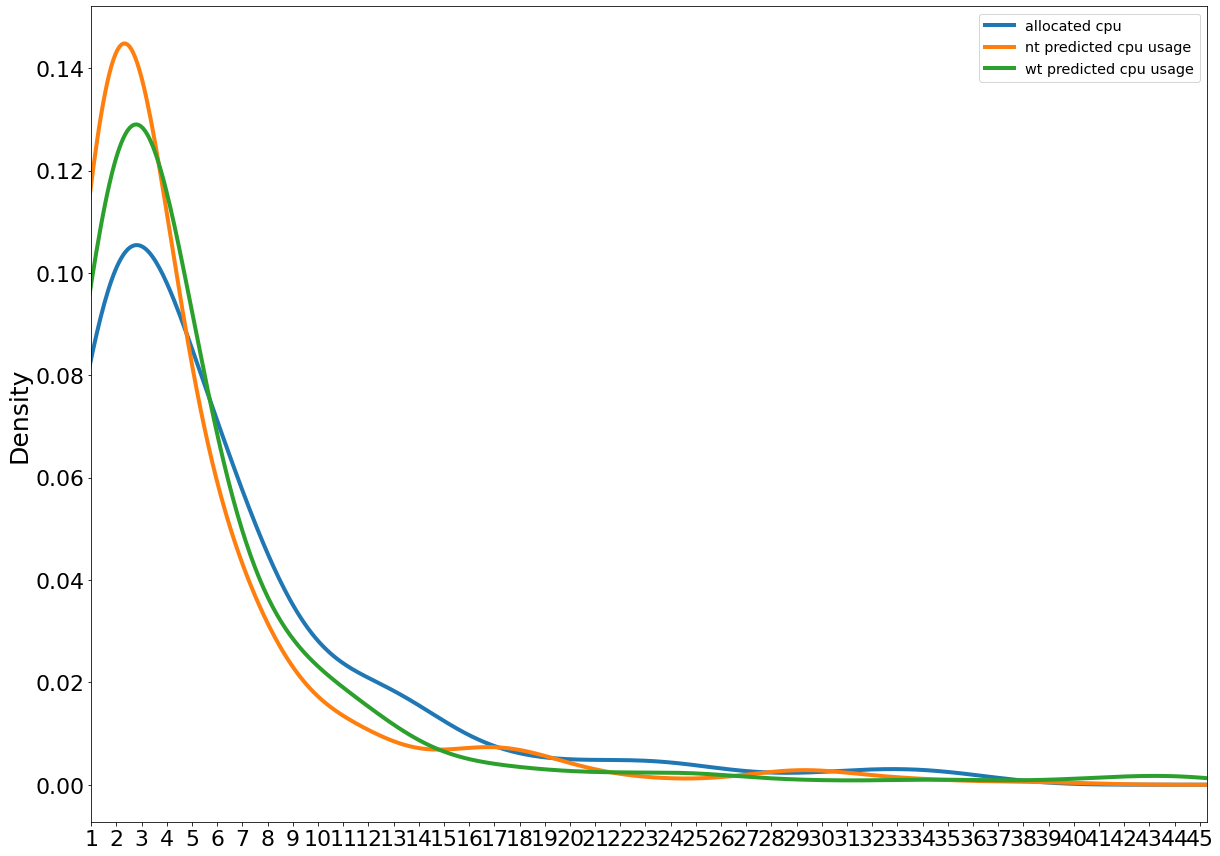

In [77]:
test = get_over_allocated_dataframe(norm_df, [0, 1, 2], quantile=0.95)
# sns.kdeplot(test, fill=False)
# test.plot(kind='hist', density=True, stacked=False)
test.plot.kde(bw_method=0.3, linewidth=4)
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (20, 15),
    'axes.labelsize': 25,
    'axes.titlesize': 25,
    'xtick.labelsize': 22,
    'ytick.labelsize': 22,
}
plt.rcParams.update(params)
plt.xlim([1, test.max().max()])
plt.xticks(range(1, int(test.max().max() + 1)))
plt.show()
# sns.displot(test)

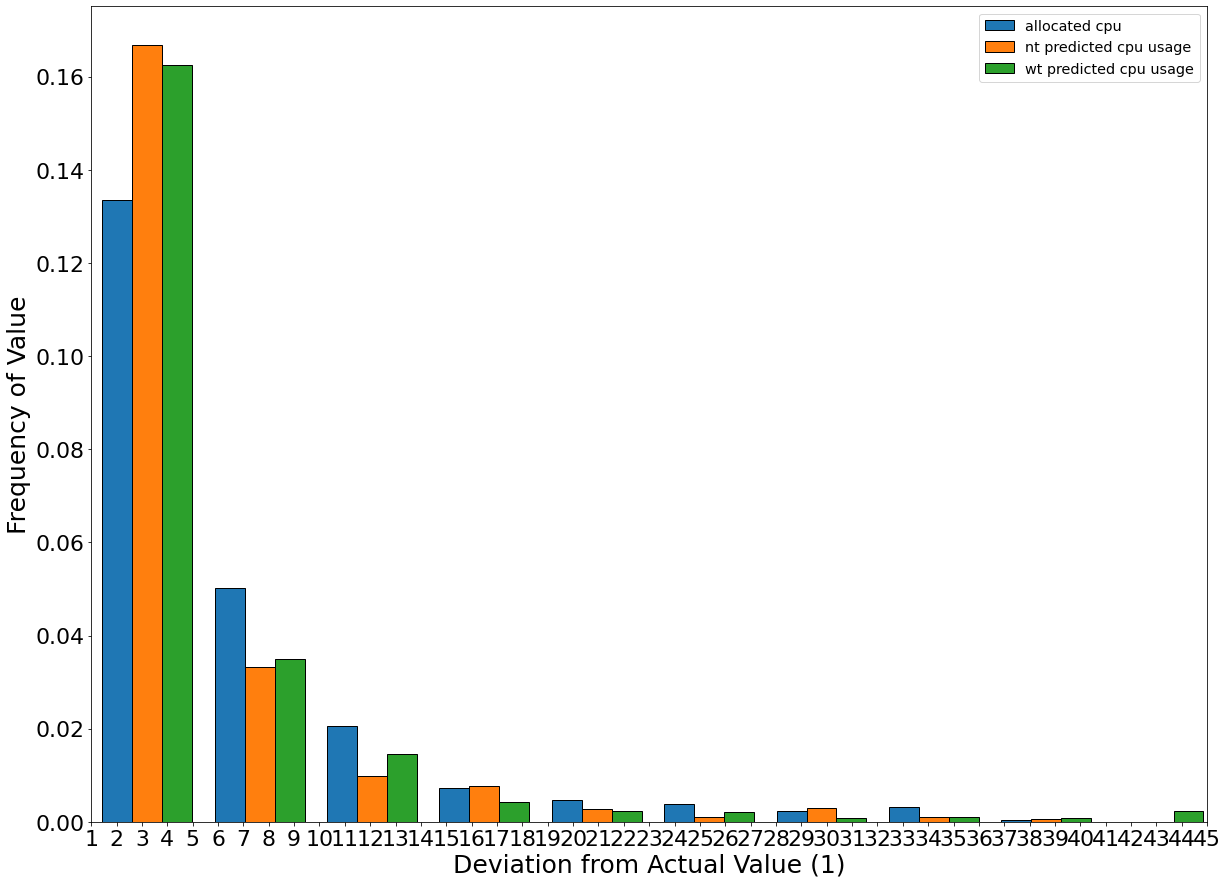

In [102]:
plot_dataframe_histogram(test, bin_size=10, density=True)

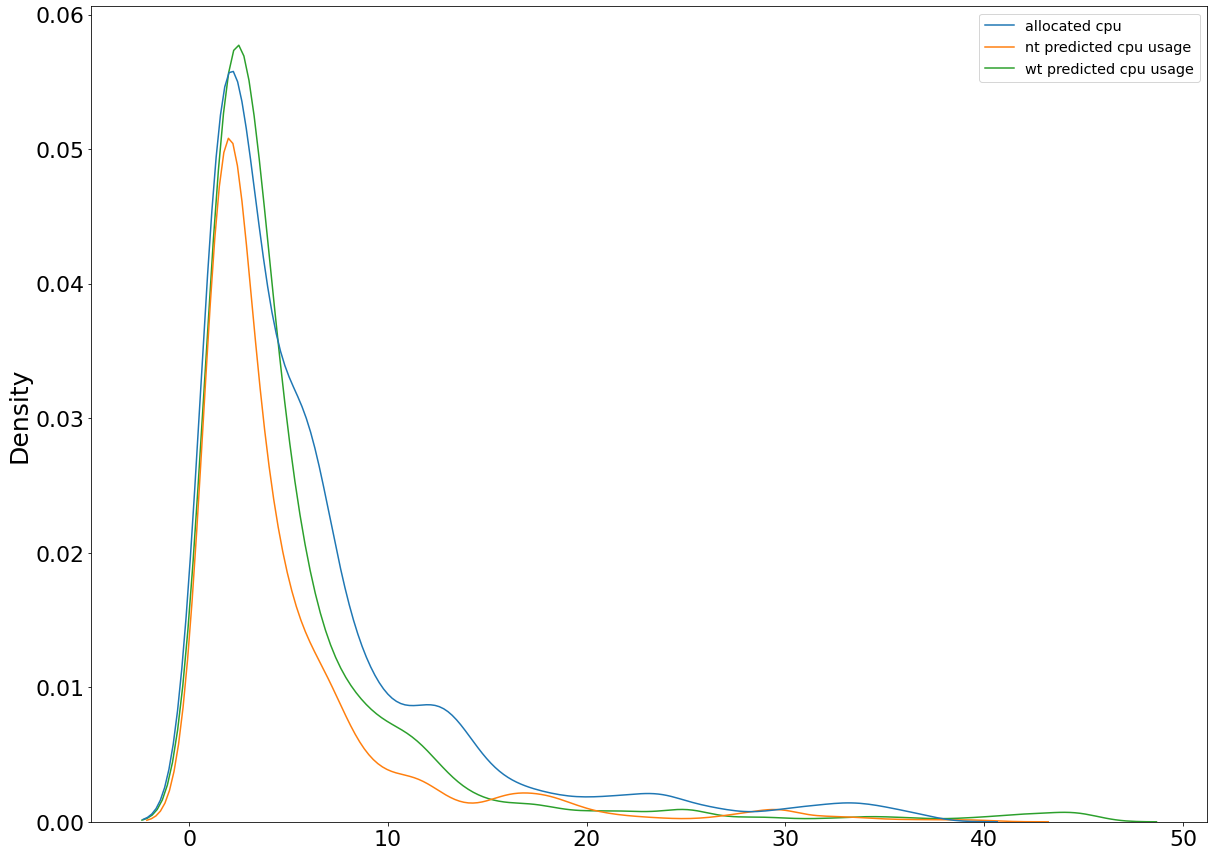

In [79]:
plot_dataframe_kde(test)

In [80]:
test.describe()

,allocated cpu,nt predicted cpu usage,wt predicted cpu usage
count,7796.000000,4966.000000,6491.000000
mean,6.401334,4.952907,5.418446
std,6.621991,5.719157,6.508031
min,1.000840,1.002216,1.001274
25%,2.072087,1.810666,2.015698
50%,4.116480,2.718621,3.342547
75%,7.709357,5.661555,5.892426
max,37.350657,40.099378,45.295702


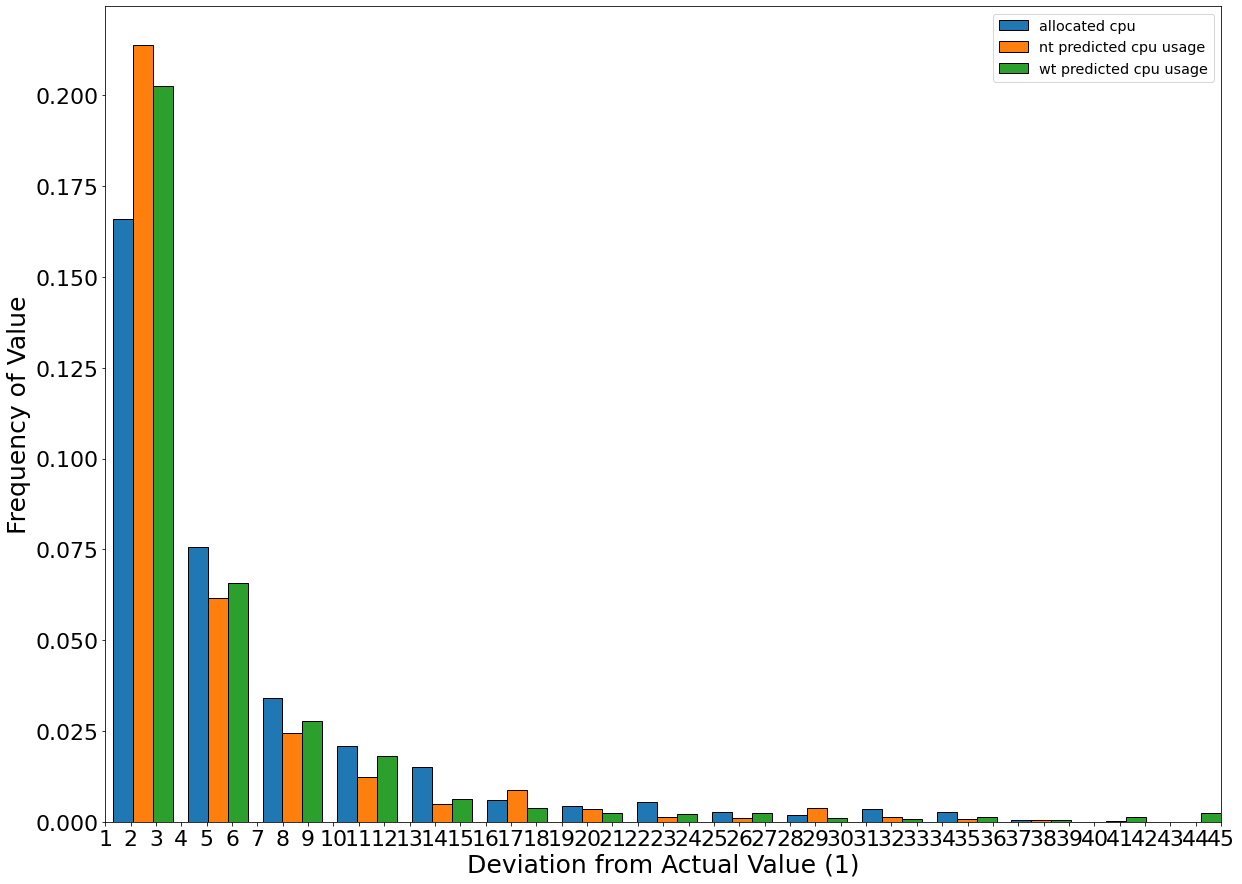

In [101]:
plot_dataframe_histogram(get_over_allocated_dataframe(norm_df, [0, 1, 2], quantile=0.95), save_path='df_over_alloc_hist.png', bin_size=15, density=True)

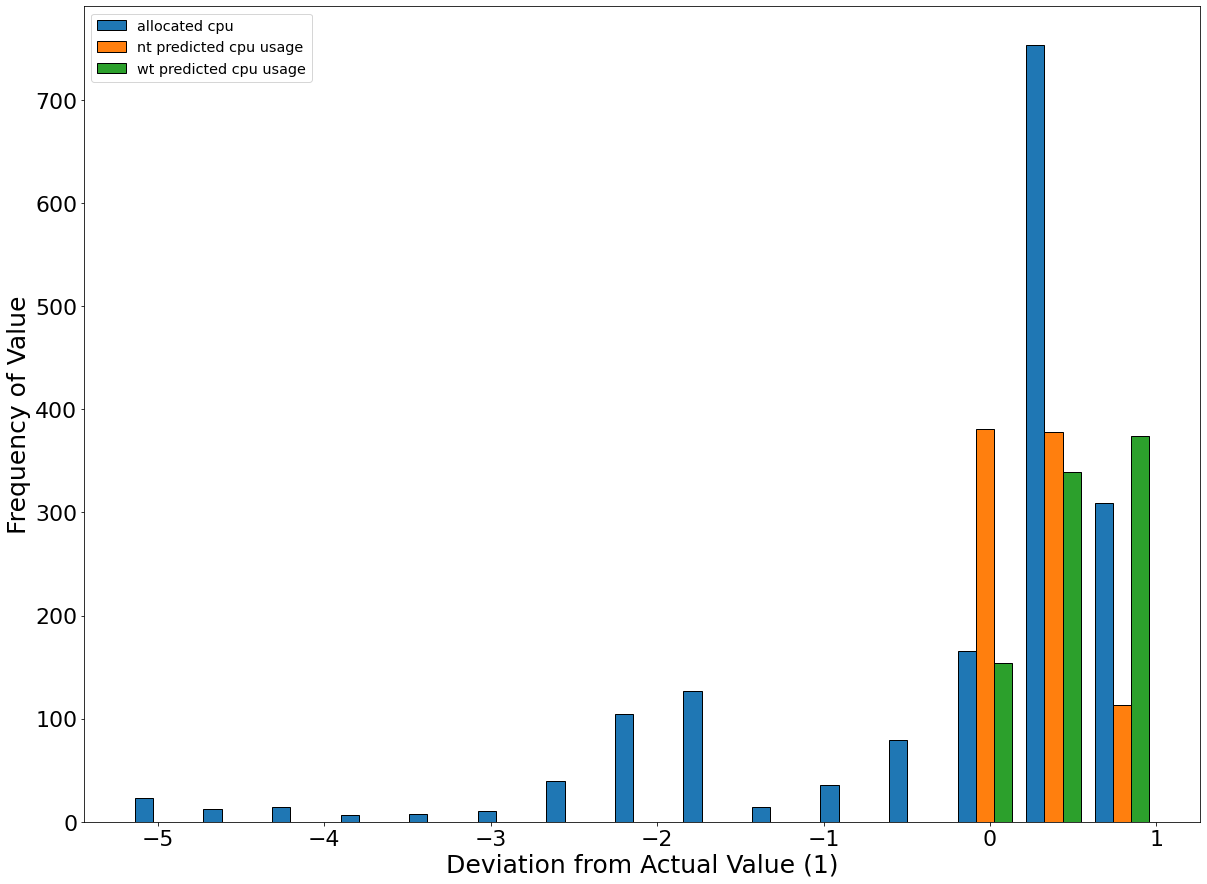

In [82]:
under_alloc_df = get_under_allocated_dataframe(norm_df, [0, 1, 2], quantile=0.95)
plot_dataframe_histogram(under_alloc_df, over_allocation=False, save_path='df_under_alloc_hist.png', bin_size=15)

In [83]:
under_alloc_df.describe()

,allocated cpu,nt predicted cpu usage,wt predicted cpu usage
count,1703.000000,872.000000,867.000000
mean,-0.225896,0.292137,0.495185
std,1.263569,0.235847,0.275890
min,-5.178897,0.079982,0.112895
25%,-0.592865,0.117035,0.219885
50%,0.286513,0.200505,0.478705
75%,0.504360,0.414227,0.752960
max,0.999017,0.994877,0.999971


<AxesSubplot:>

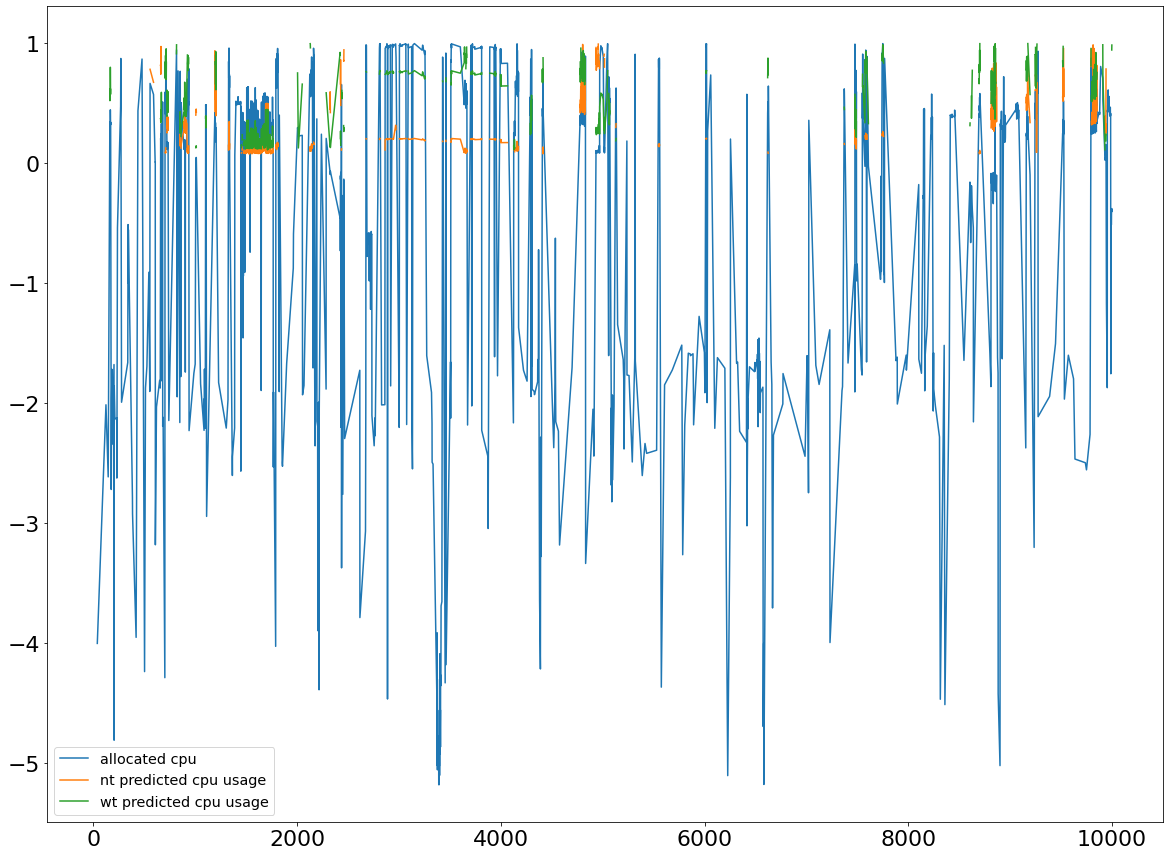

In [84]:
under_alloc_df.plot.line()

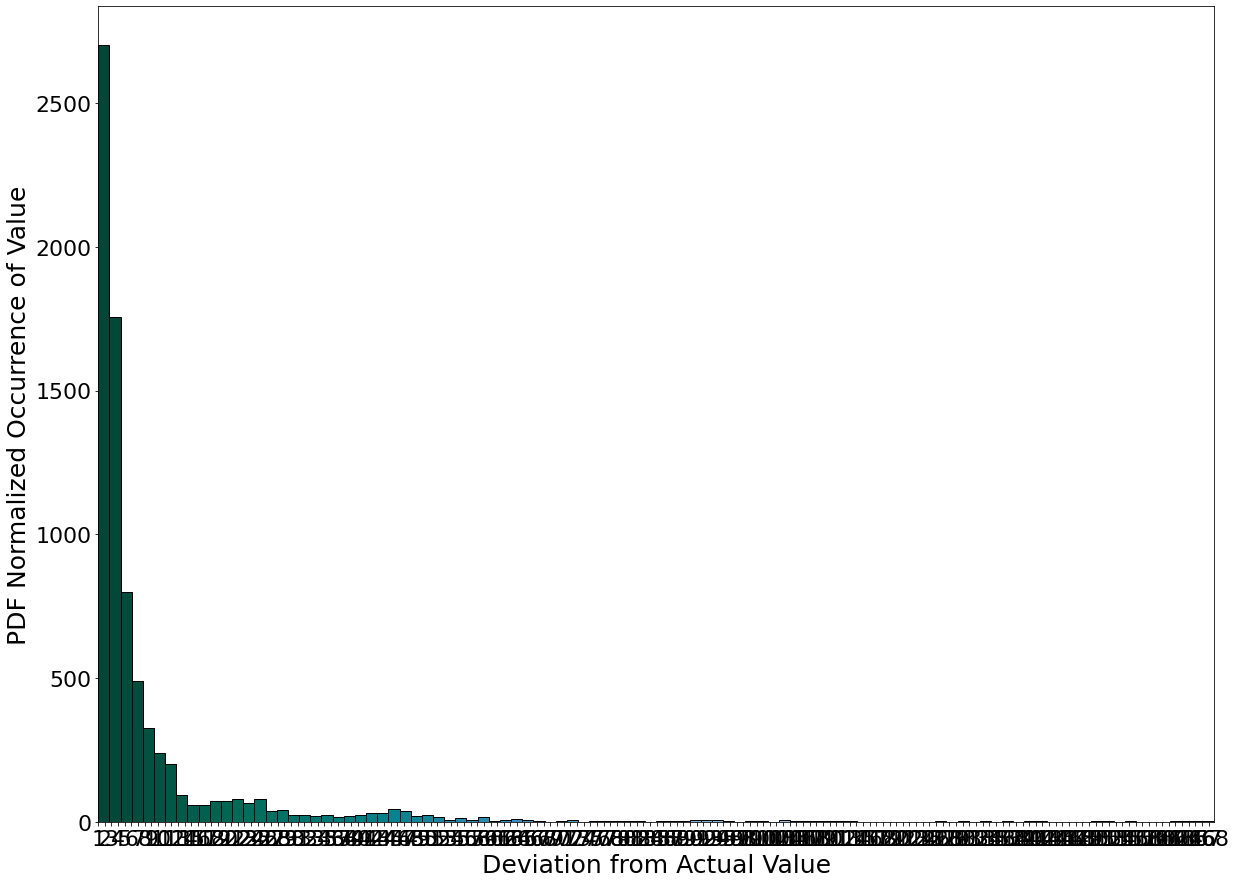

In [85]:
plot_histogram(get_over_allocated_series(norm_df, 2))

In [86]:
wt_over_allocation_series = get_over_allocated_series(norm_df, 2, quantile=0.95)
wt_under_allocation_series = get_under_allocated_series(norm_df, 2, quantile=0.05)
print(wt_over_allocation_series.describe().to_latex(index=True))

\begin{tabular}{lr}
\toprule
{} &  wt predicted cpu usage \\
\midrule
count &             7409.000000 \\
mean  &                6.512441 \\
std   &                8.037593 \\
min   &                1.001274 \\
25\%   &                2.056758 \\
50\%   &                3.487557 \\
75\%   &                6.920819 \\
max   &               45.295702 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_41785/488346146.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(wt_over_allocation_series.describe().to_latex(index=True))


In [87]:
print(wt_under_allocation_series.describe().to_latex())

\begin{tabular}{lr}
\toprule
{} &  wt predicted cpu usage \\
\midrule
count &             2090.000000 \\
mean  &                0.674204 \\
std   &                0.268633 \\
min   &                0.112895 \\
25\%   &                0.473952 \\
50\%   &                0.797151 \\
75\%   &                0.861050 \\
max   &                0.999971 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_41785/3440907117.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(wt_under_allocation_series.describe().to_latex())


In [88]:
asdf = pd.DataFrame()
asdf['wt'] = wt_over_allocation_series
asdf['nt'] = get_over_allocated_series(norm_df, 1, 0.95)
asdf.head()

,wt,nt
0,20.349742,19.140144
1,19.457699,18.301124
2,20.232417,19.029792
3,20.950029,19.704749
4,21.619666,20.334583


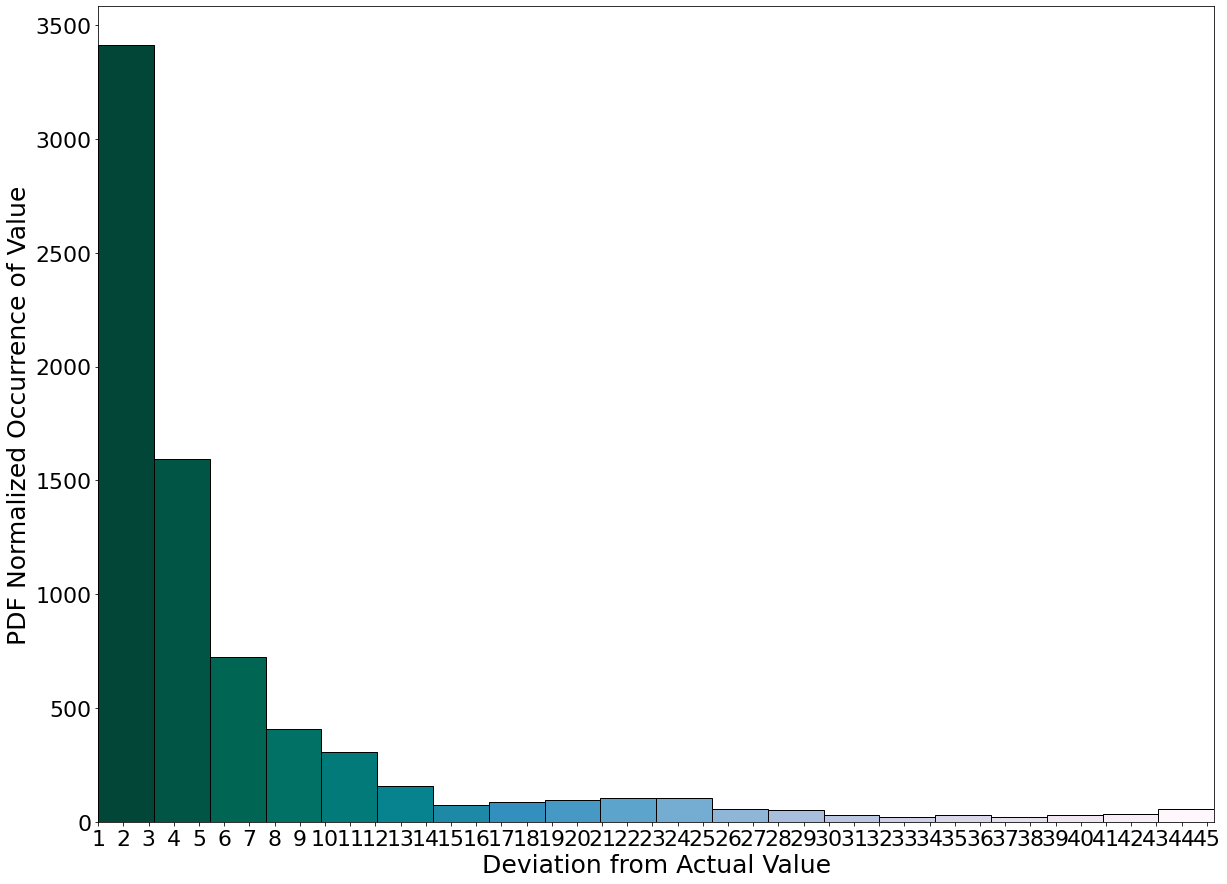

In [89]:

plot_histogram(wt_over_allocation_series, bin_size=20, save_path='wt_over_allocation.png')

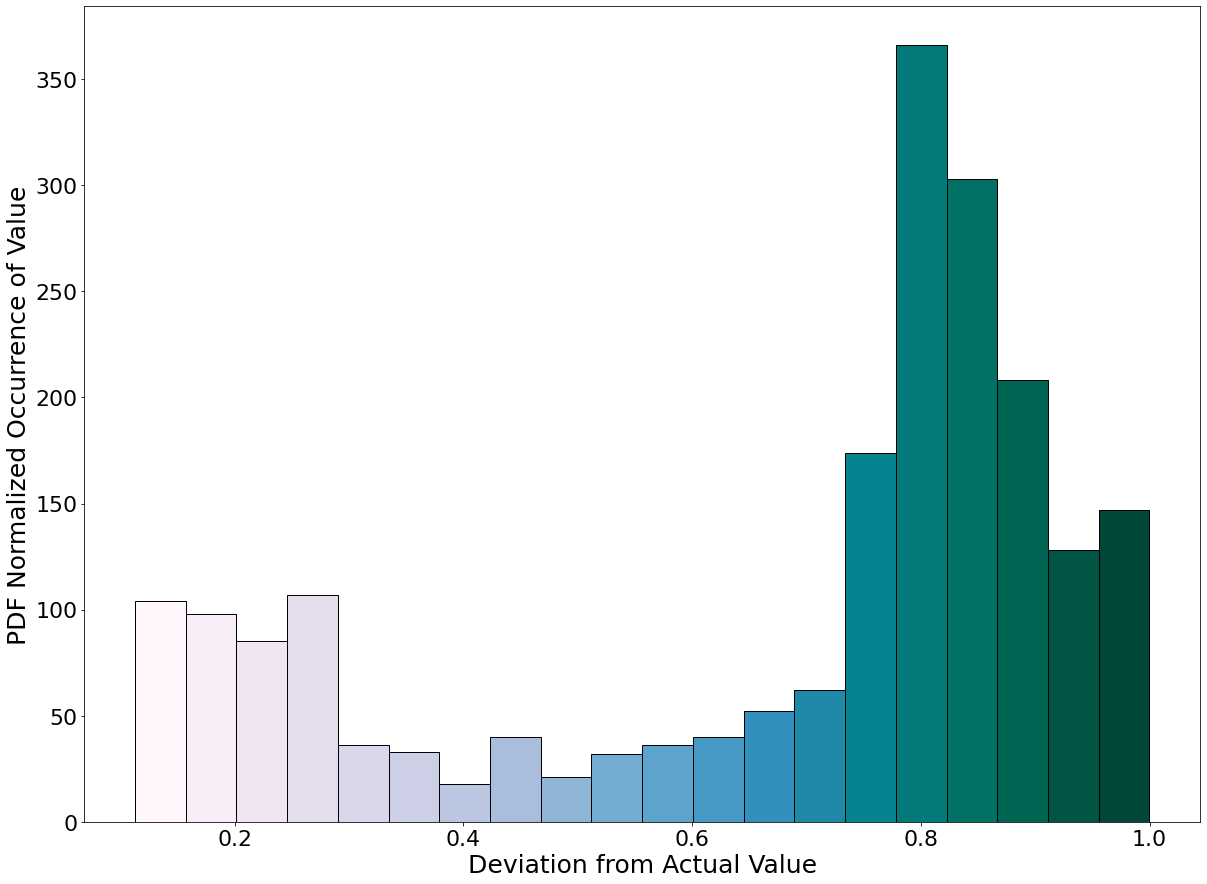

In [90]:
plot_histogram(wt_under_allocation_series, 20, over_allocation=False, save_path='wt_under_allocation.png')

In [91]:
print(describe_over_allocated_dataframe(norm_df, [0, 1, 2], quantile=0.95).to_latex())
# describe_over_allocated_dataframe(norm_df, [0, 1, 2]).loc[asdf].plot.line(figsize=(20, 15))
# describe_over_allocated_dataframe(norm_df, [0, 1, 2]).plot.line(figsize=(20, 15))

\begin{tabular}{lrrr}
\toprule
{} &  allocated cpu &  nt predicted cpu usage &  wt predicted cpu usage \\
\midrule
count &    7796.000000 &             5904.000000 &             7409.000000 \\
mean  &       6.401334 &                5.909884 &                6.512441 \\
std   &       6.621991 &                6.858800 &                8.037593 \\
min   &       1.000840 &                1.002216 &                1.001274 \\
25\%   &       2.072087 &                1.909808 &                2.056758 \\
50\%   &       4.116480 &                3.254621 &                3.487557 \\
75\%   &       7.709357 &                6.887323 &                6.920819 \\
max   &      37.350657 &               40.354796 &               45.295702 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_41785/511853515.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(describe_over_allocated_dataframe(norm_df, [0, 1, 2], quantile=0.95).to_latex())


In [92]:
describe_under_allocated_dataframe(norm_df, [0, 1, 2], quantile=0.05)

,allocated cpu,nt predicted cpu usage,wt predicted cpu usage
count,90.000000,190.000000,110.000000
mean,0.980950,0.966202,0.982813
std,0.011010,0.018900,0.010023
min,0.963225,0.933595,0.965130
25%,0.971690,0.949969,0.974598
50%,0.978941,0.967019,0.982150
75%,0.991126,0.982970,0.990971
max,0.999017,0.999359,0.999971


# Description

* What you see (in graph and other)
* How much we defer from real value
* And why we see the difference, and explain because of data, algorithm etc...

In [93]:
get_over_allocation_percentage(norm_df, 0)

81.24

In [94]:
get_under_allocation_percentage(norm_df, 0)

18.76

data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

In [95]:
def get_allocation_distribution_df(df: pd.DataFrame, columns: List[int] = None):
    if columns is None:
        columns = range(len(df.columns))

        
    percentage_list: list = []
    for col in columns:
        percentage_list.append((get_over_allocation_percentage(df, col), get_under_allocation_percentage(df, col)))
        
    
    return pd.DataFrame(percentage_list, index=df.columns, columns=['over-allocated', 'under-allocated'])
            
alloc_df = get_allocation_distribution_df(norm_df)


In [96]:
def plot_stacked_grouped(subplot, shift, width, bot1, bot2):
    x = np.arange(len(baltics))
    plt.subplot(1,2,subplot)
    plt.bar(x-shift, beer, width,
            label='beer', color='gold')
    plt.bar(x, spirit, width, bottom=bot1,
            label='spirit', color='aqua')
    plt.bar(x+shift, wine, width, bottom=bot2,
            label='wine', color='tab:red')
    plt.title('Drink consumption \\nin Baltic countries',
              fontsize=35)
    plt.xlabel(None)
    plt.xticks(baltics.index, labels, fontsize=25)
    plt.ylabel('Servings per person', fontsize=27)
    plt.yticks(fontsize=20)
    sns.despine(bottom=True)
    plt.tick_params(bottom=False, left=True)
    plt.legend(frameon=False, fontsize=17)
    return None

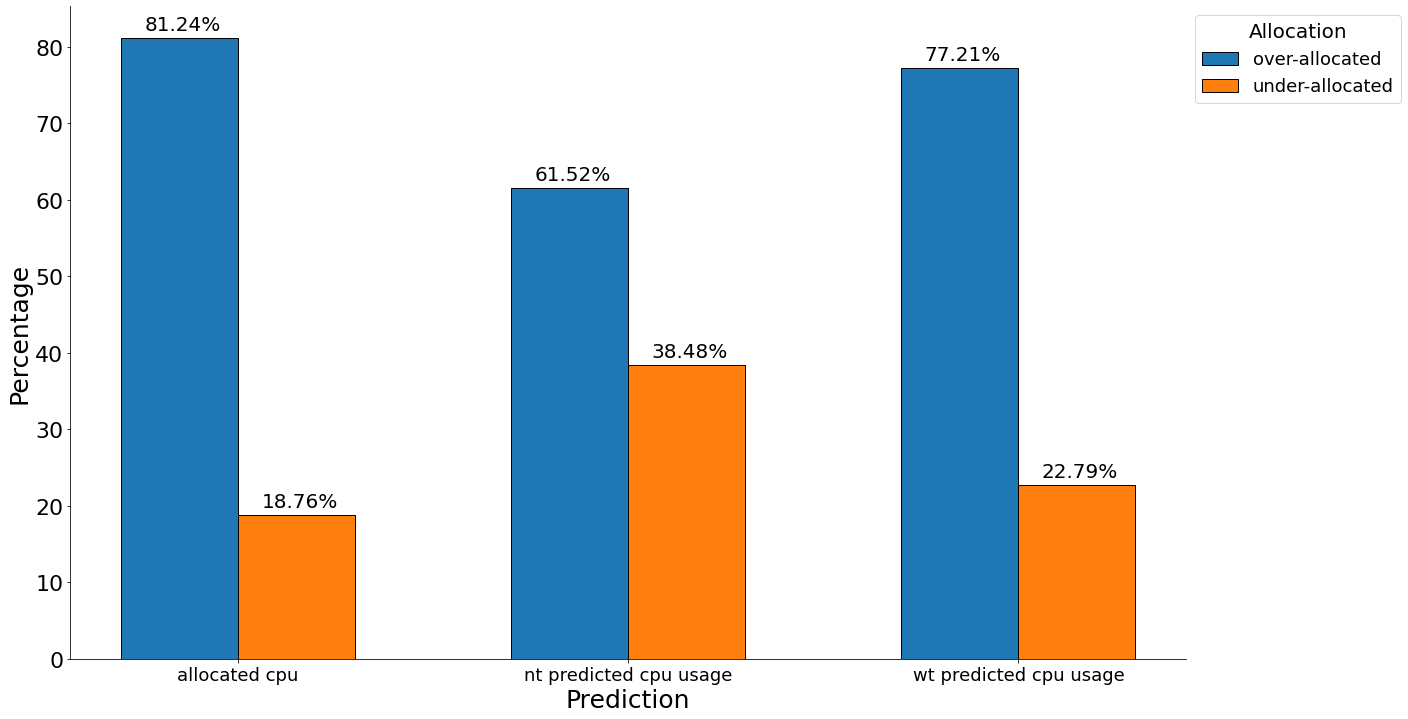

In [97]:
# Generating labels and index
label = alloc_df.index
x = np.arange(len(label))

#create the base axis
fig, ax = plt.subplots(figsize = (20,12))#set the width of the bars
width = 0.3 # add first pair of bars
rect1 = ax.bar(x - width / 2,
              alloc_df['over-allocated'],
              width = width, 
               label = "No",
               edgecolor = "black") # add second pair of bars 
rect2 = ax.bar(x + width / 2,
              alloc_df['under-allocated'],
              width = width,
              label = "Yes",
              edgecolor = "black")

# Reset x-ticks
ax.set_xticks(x)
# Setting x-axis tick labels
ax.set_xticklabels(label)

# Adding bar values
for p in ax.patches:
    t = ax.annotate(str(p.get_height()) + "%", xy = (p.get_x() + 0.06, p.get_height() + 1))
    t.set(color = "black", size = 20)
    
# Remove spines
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)# Adding axes and tick labels
ax.tick_params(axis = "x", labelsize = 18, labelrotation = 0)
ax.set_ylabel("Percentage", size = 25)
ax.set_xlabel("Prediction", size = 25)

# Customize legend
ax.legend(labels = alloc_df.columns,
          fontsize = 18,
          title = "Allocation",
          title_fontsize = 20)# # Fix legend position
ax.legend_.set_bbox_to_anchor([1, 1])


In [98]:
get_over_allocation_percentage(norm_df, 2)

77.21

In [99]:
get_under_allocation_percentage(norm_df, 2)

22.79